# Work area for Floris.

contains:
 - bar graph of game count per genre per platform
 - log log plot of the correlation between score and sales
 - pearson coefficients to test for correlations/dependencies between variables

In [1]:
import numpy as np
import matplotlib.pyplot as plt                    
from scipy.stats.stats import pearsonr
import csv

key_title = 'title'
key_platform = 'platform'
key_score = 'score'
key_release_y = 'release_year'
key_release_m = 'release_month'
key_release_d = 'release_day'
key_release_q = 'release_quarter'

key_rank = 'Rank'
key_genre = 'Genre'
key_publisher = 'Publisher'
key_NA = 'NA_Sales'
key_EU = 'EU_Sales'
key_JP = 'JP_Sales'
key_other = 'Other_Sales'
key_global = 'Global_Sales'

keys = [key_title, key_platform, key_score, key_release_y, key_release_m, key_release_d, key_release_q,\
        key_rank, key_genre, key_publisher, key_NA, key_EU, key_JP, key_other, key_global]

def beautify_dict(data):
    for i in range(0, len(data)):
        data[i][key_score] = float(data[i][key_score])
        data[i][key_rank] = int(data[i][key_rank])
        data[i][key_release_y] = int(data[i][key_release_y])
        data[i][key_release_m] = int(data[i][key_release_m])
        data[i][key_release_d] = int(data[i][key_release_d])
        data[i][key_release_q] = ['Q1', 'Q2', 'Q3', 'Q4'][(data[i][key_release_m] - 1) // 3]
        data[i][key_NA] = float(data[i][key_NA])
        data[i][key_EU] = float(data[i][key_EU])
        data[i][key_JP] = float(data[i][key_JP])
        data[i][key_other] = float(data[i][key_other])
        data[i][key_global] = float(data[i][key_global])

def get_beautiful_dict(file_name):    
    fin = open(file_name, 'r')
    file_data = csv.DictReader(fin)

    data = [row for row in file_data]      
    beautify_dict(data)
    return data

data = get_beautiful_dict('data/our_data.csv')
data_xbox = get_beautiful_dict('data/our_data_Xbox.csv')
data_playstation = get_beautiful_dict('data/our_data_PlayStation.csv')
data_nintendo = get_beautiful_dict('data/our_data_Nintendo.csv')
data_pc = get_beautiful_dict('data/our_data_PC.csv')

## some utility functions

In [2]:
def get_all_from_data(key, data):
    return [row[key] for row in data]

def get_unique_from_data(key, data):
    return list(set(get_all_from_data(key, data)))

def calc_r(data_set1, data_set2):
    r, p = pearsonr(data_set1, data_set2)
    return r

def calc_r_key(key1, key2, data):
    return calc_r(get_all_from_data(key1, data), get_all_from_data(key2, data))

def split_categorical_key(key, data):
    res_data = [dict() for row in data]
    
    categories = get_unique_from_data(key, data)
    
    for i, row in enumerate(res_data):
        for cat in categories:
            if cat == data[i][key]:
                row[cat] = 1
            else:
                 row[cat] = 0
    
    return categories, res_data

def from_lod_to_dol(data):
    res = dict()
    for key in data[0]:
        res[key] = [data[0][key]]
        
    for i in range(1, len(data)):
        for key in data[i]:
            res[key].append(data[i][key])
            
    return res

## prefetch some usefull data

In [3]:
genres = get_unique_from_data(key_genre, data)
platforms = get_unique_from_data(key_platform, data)
publishers = get_unique_from_data(key_publisher, data)
scores = get_all_from_data(key_score, data)
sales = get_all_from_data(key_global, data)

## A plot of the game count per genre per platform

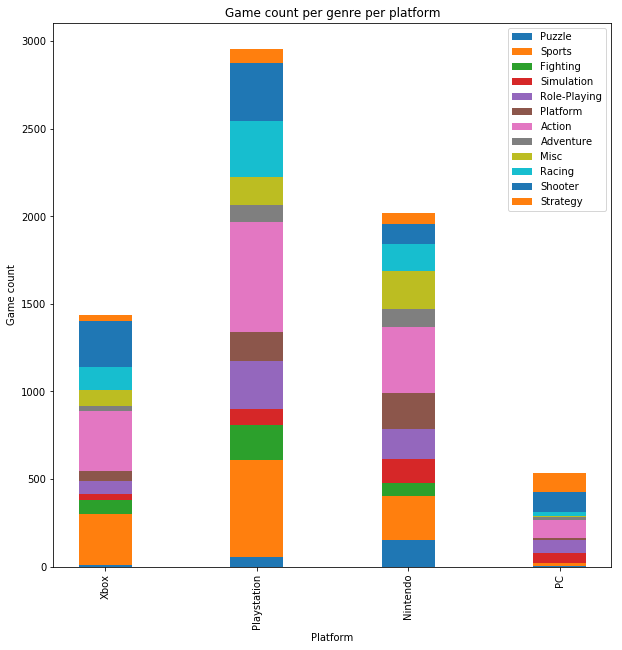

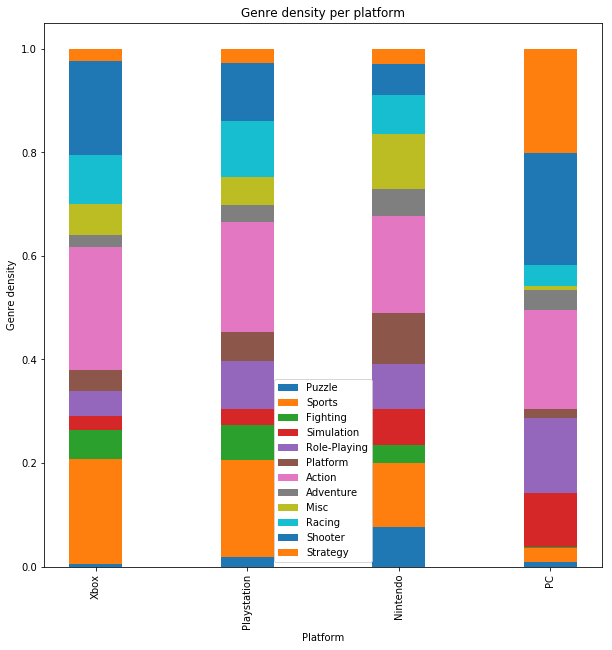

In [4]:
count_per_platform_per_genre = [[0 for _ in range(4)] for g in genres]
for i, g in enumerate(genres):
    for row in data_xbox:
        if row[key_genre] == g:
            count_per_platform_per_genre[i][0] += 1
    
    for row in data_playstation:
        if row[key_genre] == g:
            count_per_platform_per_genre[i][1] += 1            
    
    for row in data_nintendo:
        if row[key_genre] == g:
            count_per_platform_per_genre[i][2] += 1            
    
    for row in data_pc :
        if row[key_genre] == g:
            count_per_platform_per_genre[i][3] += 1
plots = []
plt.figure(figsize=(10, 10))

sum_so_far = [0 for _ in range(4)]
for i, genre in enumerate(genres):
    plots.append(plt.bar(range(4), count_per_platform_per_genre[i], 0.35, bottom = sum_so_far))
    sum_so_far = [s + count_per_platform_per_genre[i][j] for j, s in enumerate(sum_so_far)]

plt.ylabel('Game count')
plt.xlabel('Platform')
plt.title('Game count per genre per platform')
plt.xticks(range(4), ["Xbox", "Playstation", "Nintendo", "PC"], rotation='vertical')
plt.legend([p[0] for p in plots], genres)
plt.show()

plots = []
plt.figure(figsize=(10, 10))

total = [0 for _ in range(4)]
for i, genre in enumerate(genres):
    total = [s + count_per_platform_per_genre[i][j] for j, s in enumerate(total)]
    

sum_so_far = [0 for _ in range(4)]
for i, genre in enumerate(genres):
    plots.append(plt.bar(range(4), [c / total[j] for j, c in enumerate(count_per_platform_per_genre[i])] , 0.35, bottom = sum_so_far))
    sum_so_far = [s + count_per_platform_per_genre[i][j] / total[j] for j, s in enumerate(sum_so_far)]

plt.ylabel('Genre density')
plt.xlabel('Platform')
plt.title('Genre density per platform')
plt.xticks(range(4), ["Xbox", "Playstation", "Nintendo", "PC"], rotation='vertical')
plt.legend([p[0] for p in plots], genres)
plt.show()

## a plot showing the correlation between the score and sales figures

The pearson correlation coefficient between these two is roughly 0.22, indicating a mild but present correlation. The plot is shown with log scales on both the y axis to better represent the small distances in the low values and the large differences in the high values of the sales data. It shows a clear correlation between score and sales.

Pearson correlation coefficient (r) between the score and the global sales: 0.2296


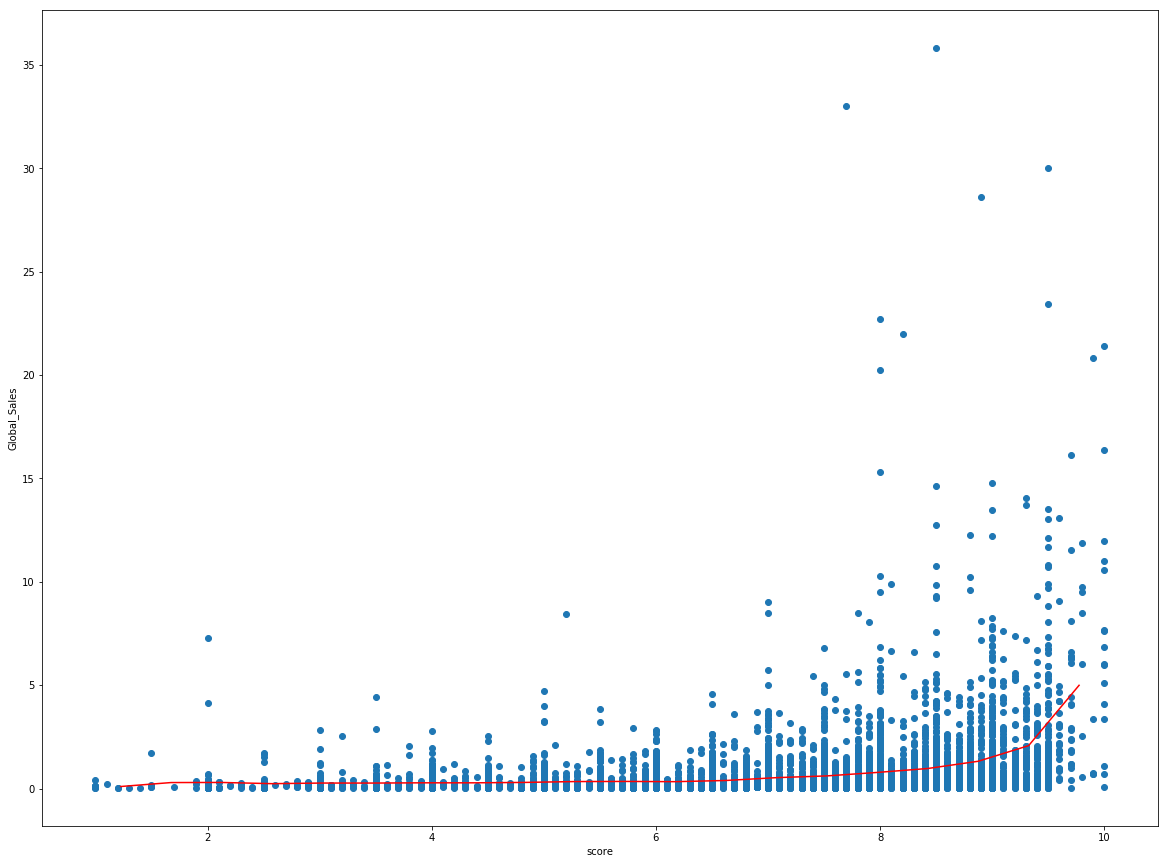

In [5]:
print("Pearson correlation coefficient (r) between the score and the global sales: {:.4}".format(calc_r_key(key_score, key_global, data)))

#points = [(scores[i], sales[i]) for i in range(len(scores))]
points = [(scores[i], sales[i]) for i in range(len(scores)) if sales[i] < 60]
points = sorted(points, key=lambda x: x[0])
num_bins = 20
bins = [0.0 for _ in range(num_bins)]
avgs = [0.0 for _ in range(num_bins)]
for i in range(num_bins):
    mi = 1 + 9/num_bins * i
    ma = mi + 9/num_bins
    avgs[i] = mi + 1/2 * 9/num_bins
    num_in_bin = 0
    for x, y in points:
        if x >= mi and x <= ma:
            bins[i] += y
            num_in_bin += 1
    bins[i] /= num_in_bin

plt.figure(figsize=(20, 15))
plt.plot(avgs, bins, c='r')
plt.scatter([x for x, y in points], [y for x, y in points])
plt.xlabel(key_score)
plt.ylabel(key_global)
#plt.yscale('log')
#plt.xscale('log')
plt.show()

## Tracking of correlation between variables

We want to use a multi-linear regression model, but for that we need to prove that there is no correlation between variables so that they won't influence the model. The model should predict sales, so we want to have a correlation between sales and the variables, but not between any other variables. The variables we use in our model are genre, score and release quarter.

As you can see from the corresponding plots below, there is a clear correlation between the quarter and sales. Sales increases in Q3 and Q4, but only for the high end. The average stays roughly the same.

There is also a clear correlation between sales and genre, with a big difference in sales per genre.

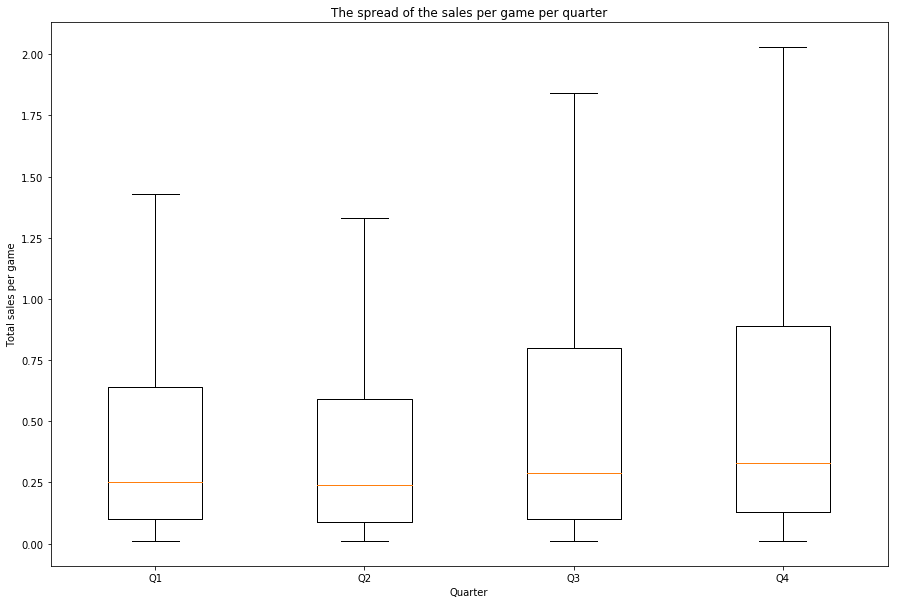

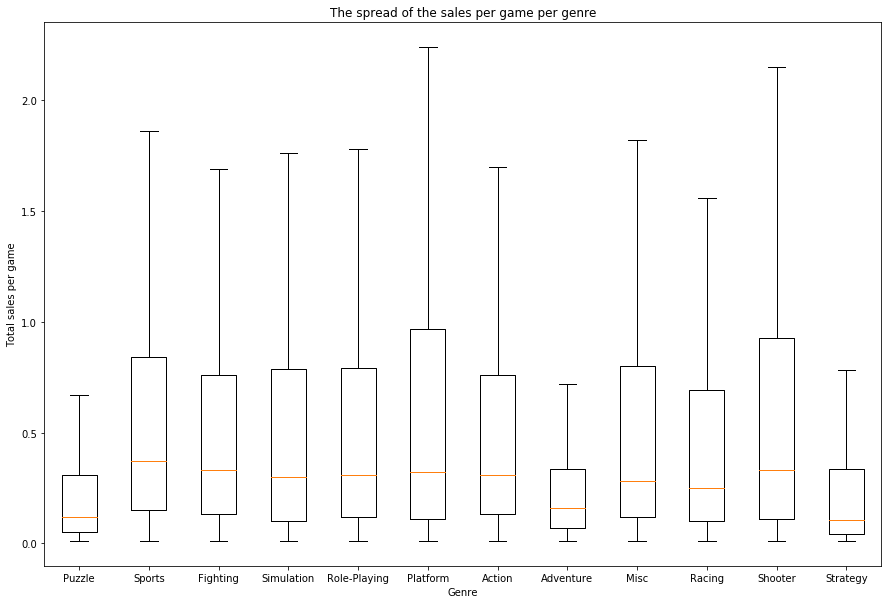

In [6]:
def plot_box_plot(categorie_data, categories, value_data, xlabel, ylabel, title):
    # box plot of sales per quarter
    value_per_categorie = [[] for _ in range(len(categories))]
    for i, value in enumerate(value_data):
        for j, categorie in enumerate(categories):
            if categorie_data[categorie][i] == 1:
                value_per_categorie[j].append(value)

    plt.figure(figsize=(15, 10))
    plt.boxplot(value_per_categorie, 0, '')
    plt.xticks(range(1, len(categories) + 1), categories)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.title(title)
    plt.show()
    
#scores and sales already exist
# categorical data
genres, genre_data = split_categorical_key(key_genre, data)
quarters, quarter_data = split_categorical_key(key_release_q, data)
genre_data = from_lod_to_dol(genre_data)
quarter_data= from_lod_to_dol(quarter_data)

plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], sales, 'Total sales per game', 'Quarter', 'The spread of the sales per game per quarter')
plot_box_plot(genre_data, genres, sales, 'Total sales per game', 'Genre', 'The spread of the sales per game per genre')


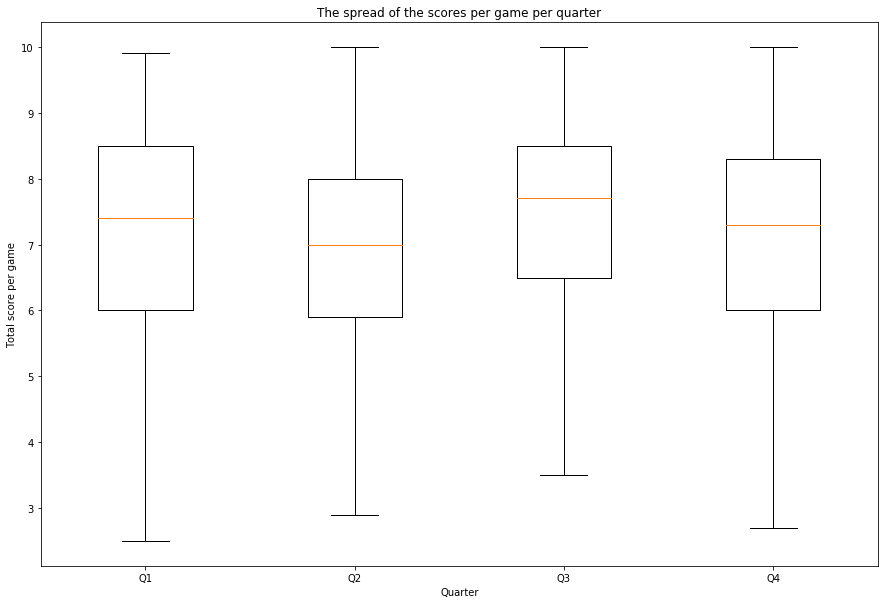

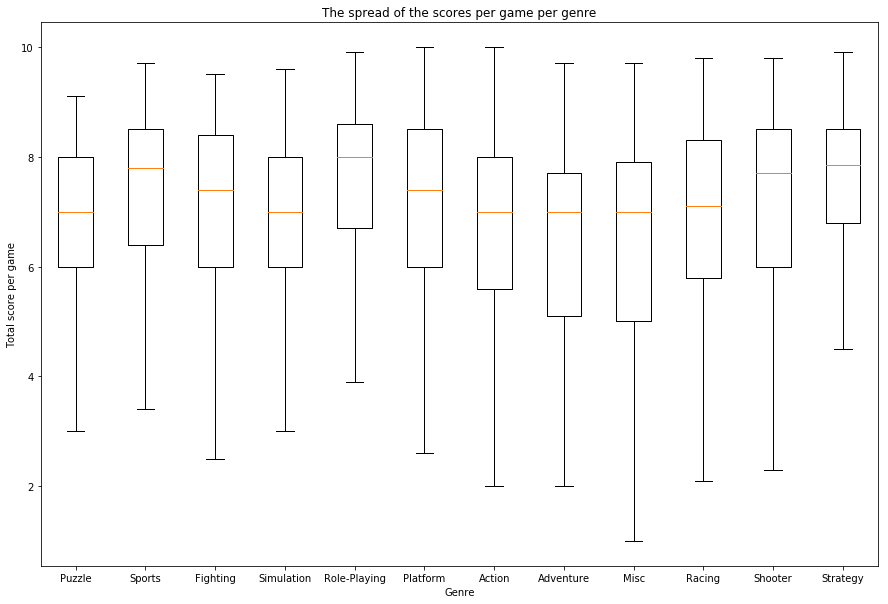

In [7]:

plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], scores, 'Total score per game', 'Quarter', 'The spread of the scores per game per quarter')
plot_box_plot(genre_data, genres, scores, 'Total score per game', 'Genre', 'The spread of the scores per game per genre')


## Next step: see if this remains the same when plotting for xbox, playstation, nintendo or pc. How does it change?

I expect that different genres especially differ greatly for each of these 4, but that quarters remain roughly the same.

### xbox

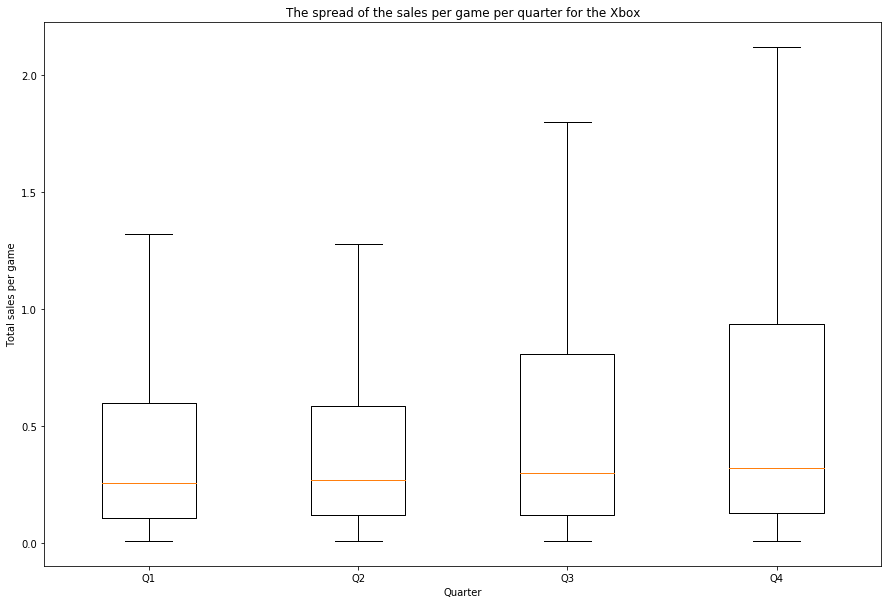

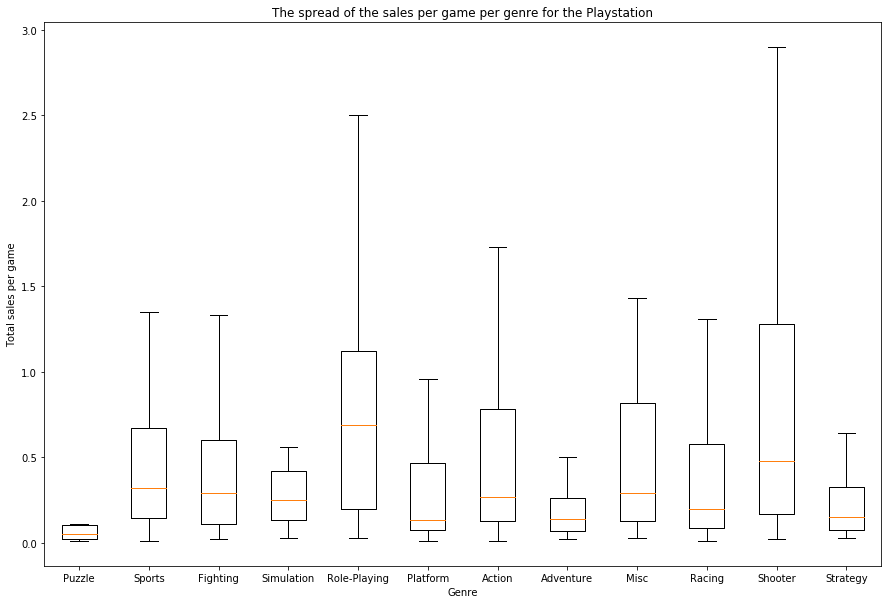

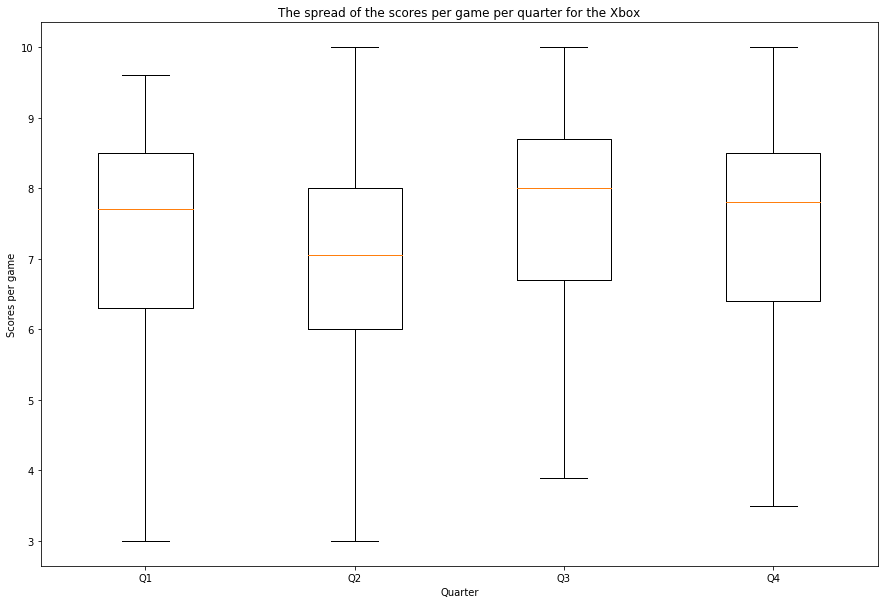

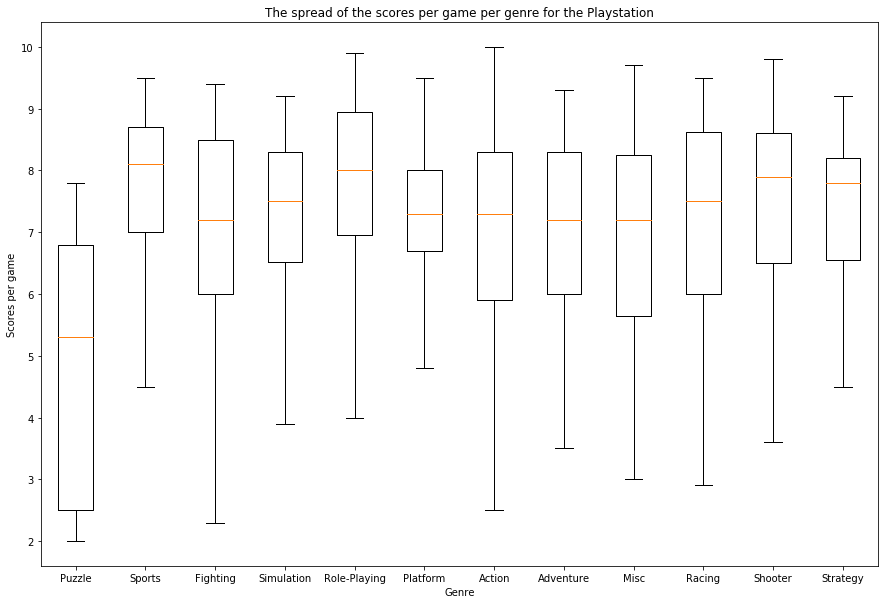

In [8]:
#scores and sales
scores = get_all_from_data(key_score, data_xbox)
sales = get_all_from_data(key_global, data_xbox)

# categorical data
genres, genre_data = split_categorical_key(key_genre, data_xbox)
quarters, quarter_data = split_categorical_key(key_release_q, data_xbox)
genre_data = from_lod_to_dol(genre_data)
quarter_data= from_lod_to_dol(quarter_data)

# xbox
plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], sales, 'Total sales per game', 'Quarter', 'The spread of the sales per game per quarter for the Xbox')
plot_box_plot(genre_data, genres, sales, 'Total sales per game', 'Genre', 'The spread of the sales per game per genre for the Playstation')

plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], scores, 'Scores per game', 'Quarter', 'The spread of the scores per game per quarter for the Xbox')
plot_box_plot(genre_data, genres, scores, 'Scores per game', 'Genre', 'The spread of the scores per game per genre for the Playstation')


### playstation

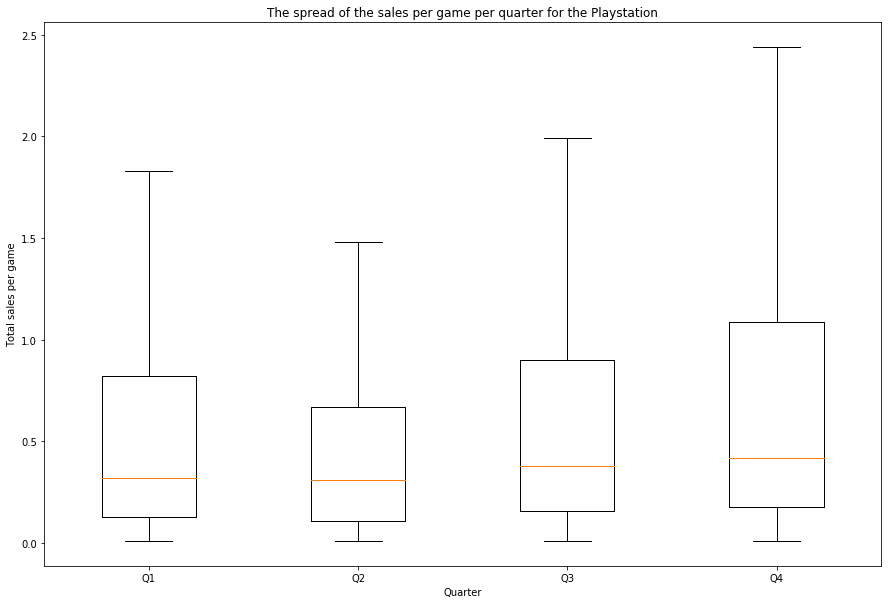

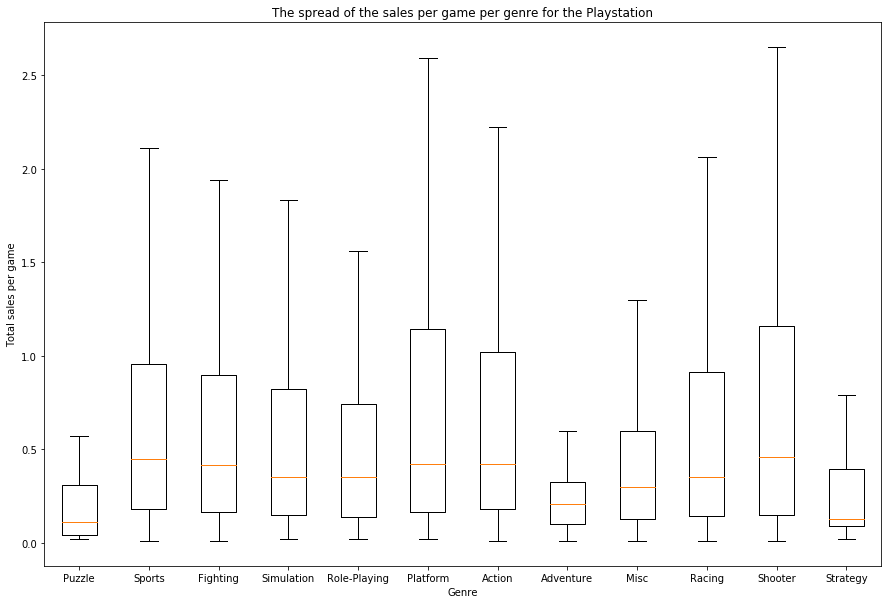

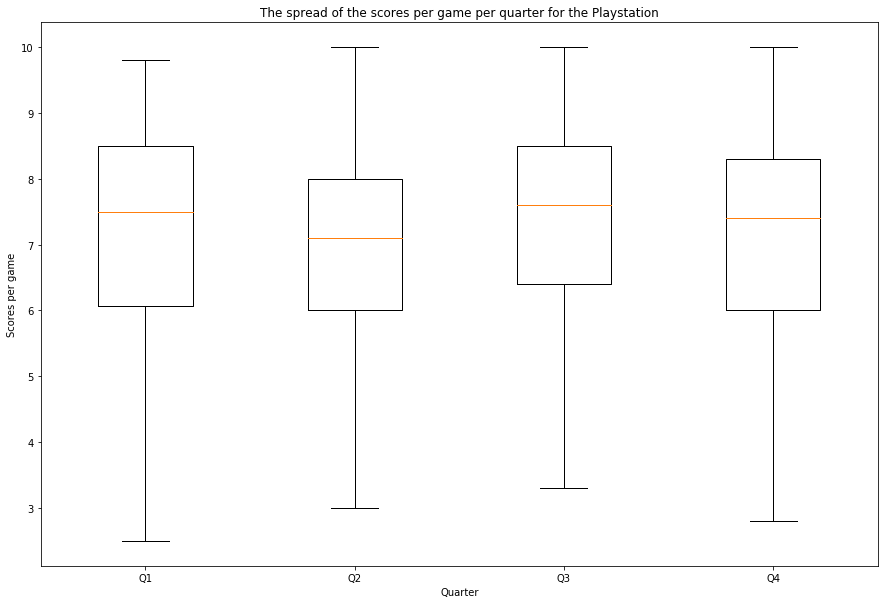

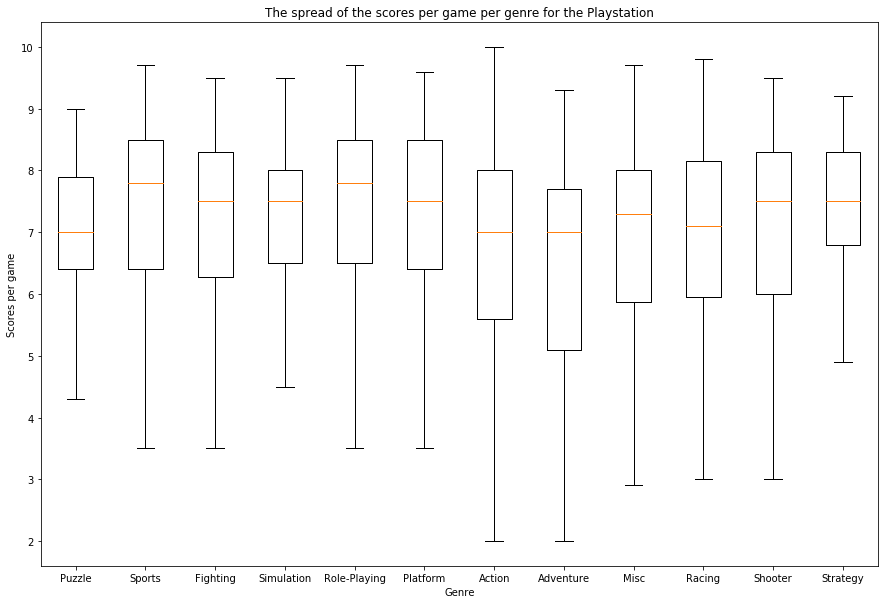

In [9]:
#scores and sales
scores = get_all_from_data(key_score, data_playstation)
sales = get_all_from_data(key_global, data_playstation)

# categorical data
genres, genre_data = split_categorical_key(key_genre, data_playstation)
quarters, quarter_data = split_categorical_key(key_release_q, data_playstation)
genre_data = from_lod_to_dol(genre_data)
quarter_data= from_lod_to_dol(quarter_data)

# xbox
plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], sales, 'Total sales per game', 'Quarter', 'The spread of the sales per game per quarter for the Playstation')
plot_box_plot(genre_data, genres, sales, 'Total sales per game', 'Genre', 'The spread of the sales per game per genre for the Playstation')

plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], scores, 'Scores per game', 'Quarter', 'The spread of the scores per game per quarter for the Playstation')
plot_box_plot(genre_data, genres, scores, 'Scores per game', 'Genre', 'The spread of the scores per game per genre for the Playstation')


### nintendo

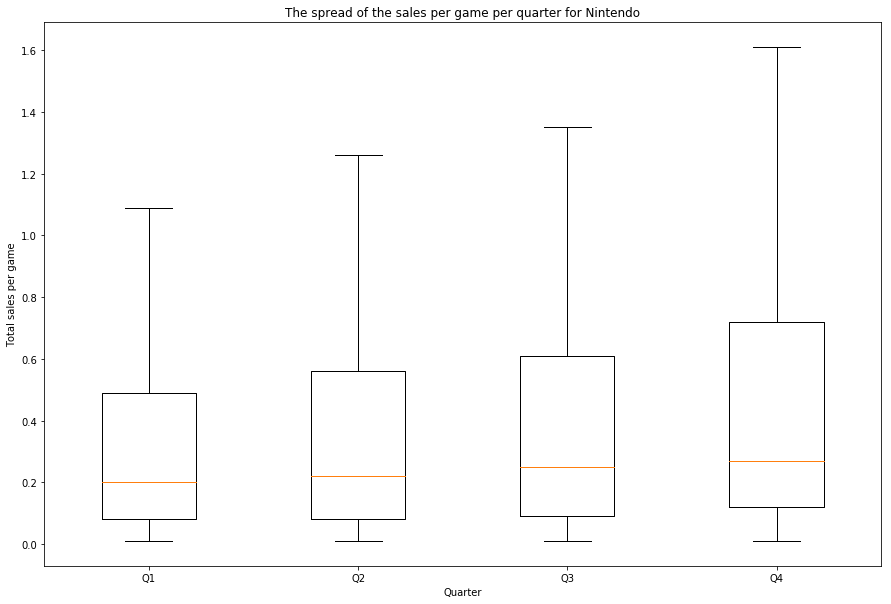

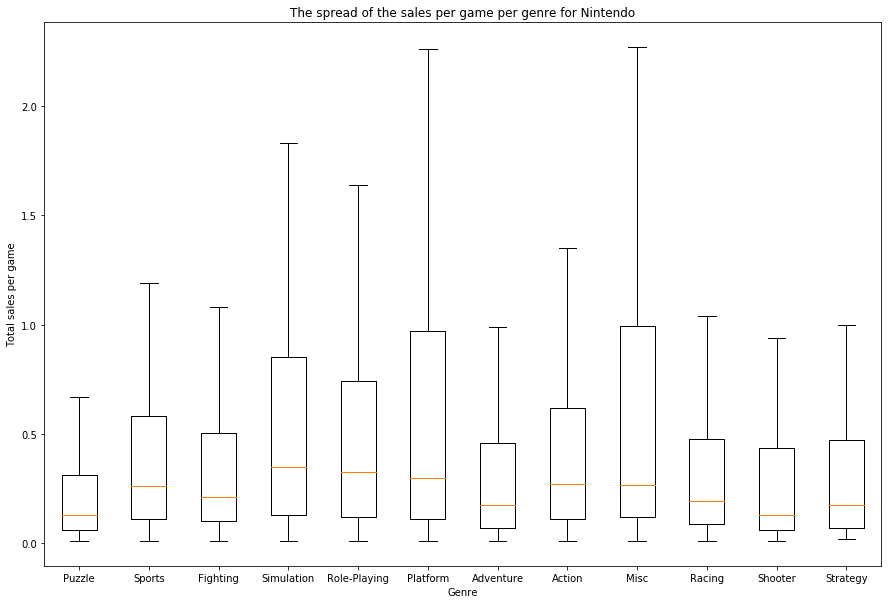

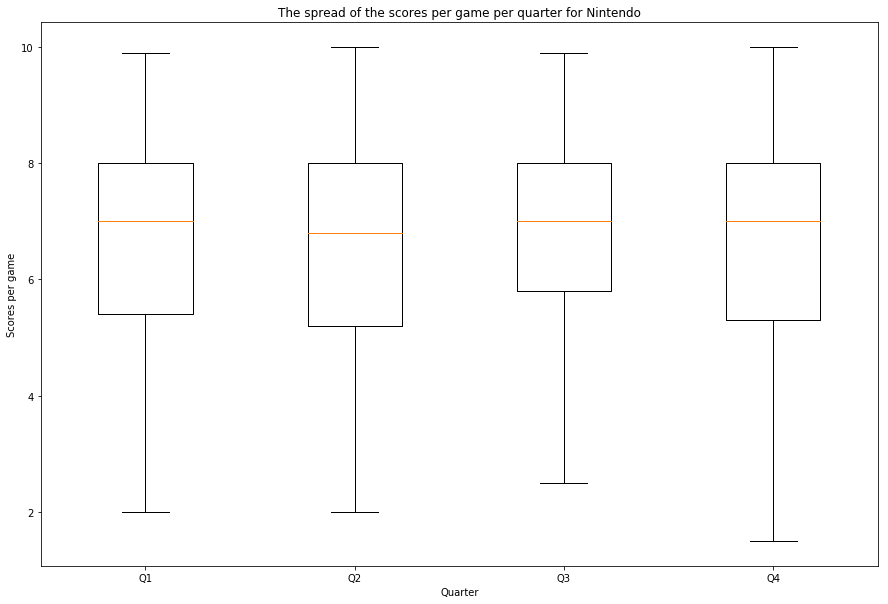

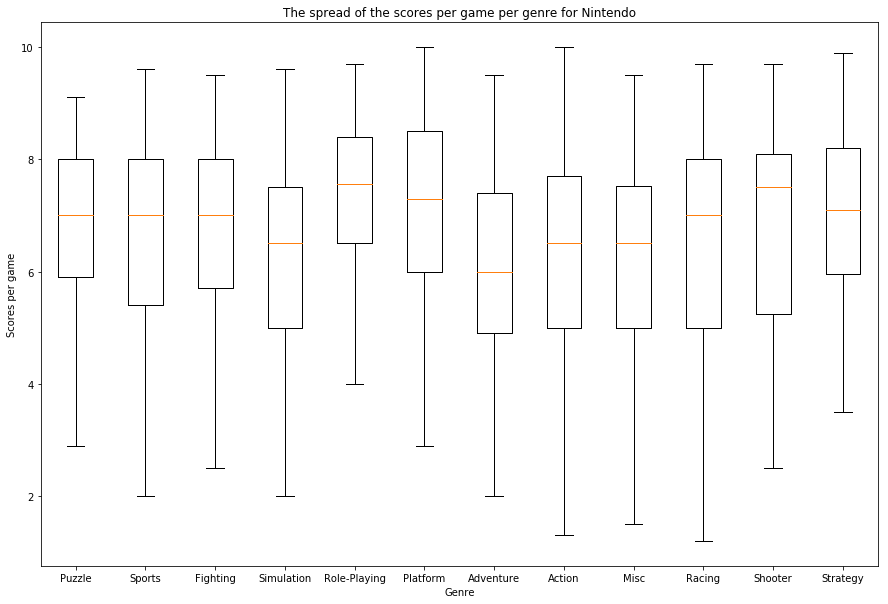

In [10]:
#scores and sales
scores = get_all_from_data(key_score, data_nintendo)
sales = get_all_from_data(key_global, data_nintendo)

# categorical data
genres, genre_data = split_categorical_key(key_genre, data_nintendo)
quarters, quarter_data = split_categorical_key(key_release_q, data_nintendo)
genre_data = from_lod_to_dol(genre_data)
quarter_data= from_lod_to_dol(quarter_data)

# nintendo
plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], sales, 'Total sales per game', 'Quarter', 'The spread of the sales per game per quarter for Nintendo')
plot_box_plot(genre_data, genres, sales, 'Total sales per game', 'Genre', 'The spread of the sales per game per genre for Nintendo')

plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], scores, 'Scores per game', 'Quarter', 'The spread of the scores per game per quarter for Nintendo')
plot_box_plot(genre_data, genres, scores, 'Scores per game', 'Genre', 'The spread of the scores per game per genre for Nintendo')


### pc

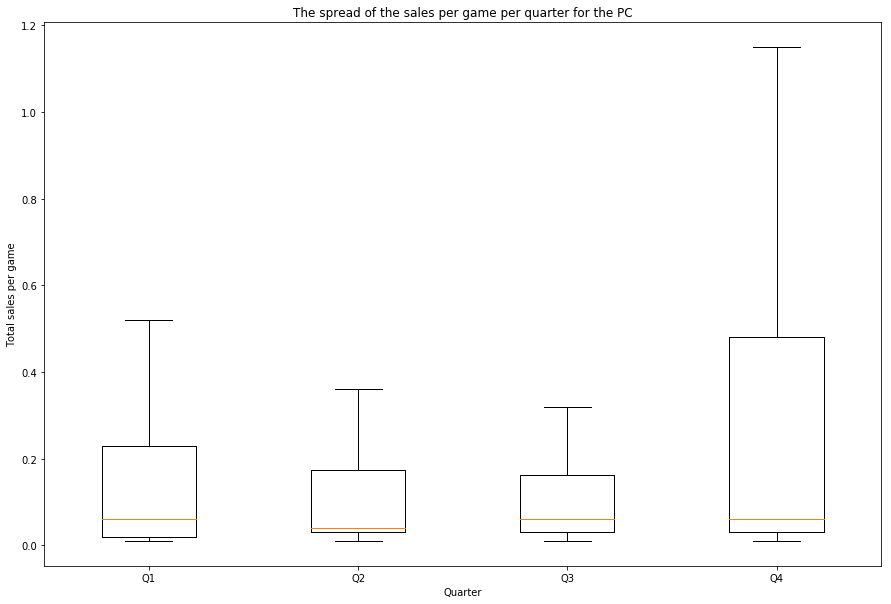

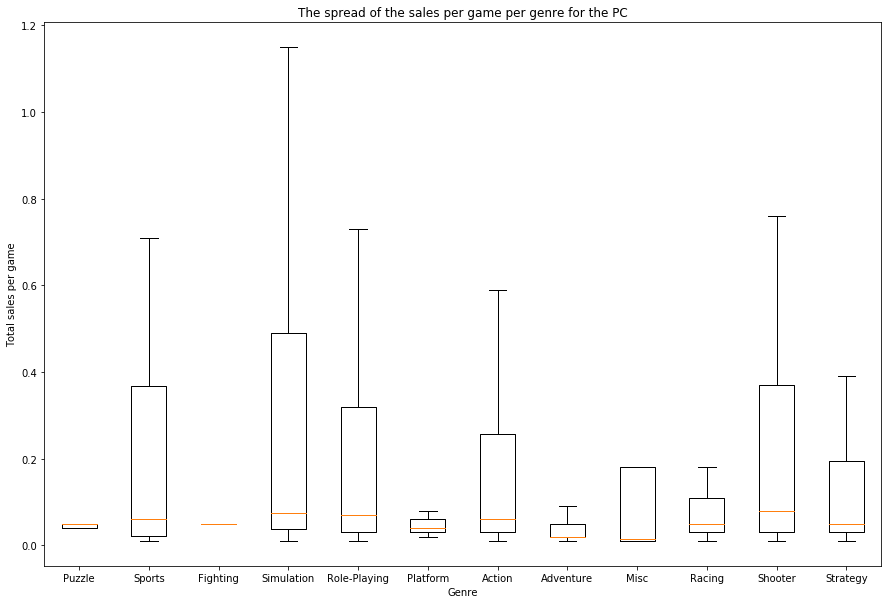

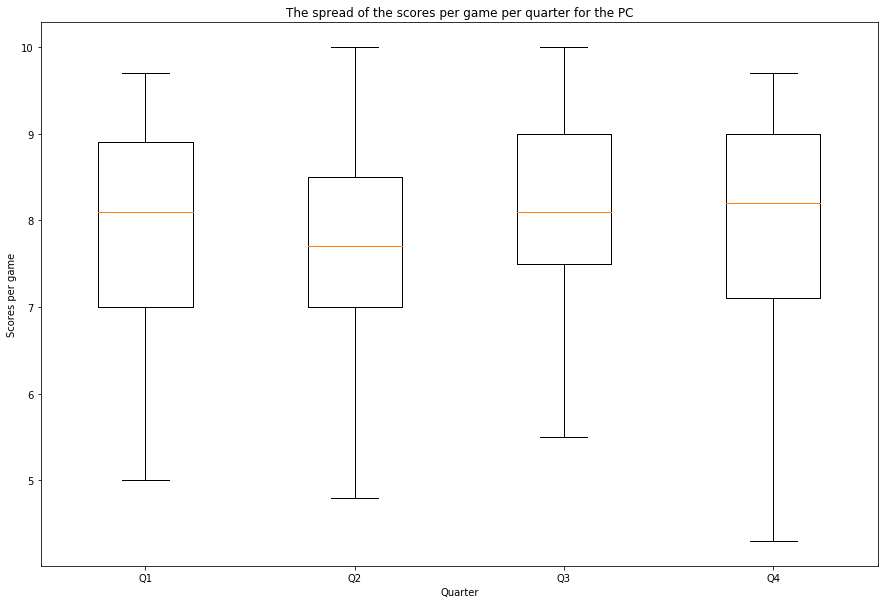

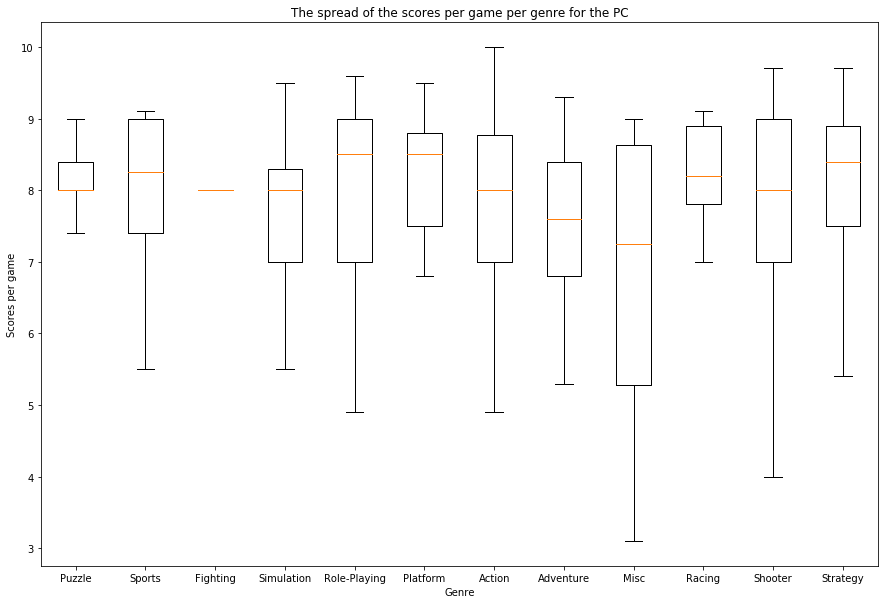

In [11]:
#scores and sales
scores = get_all_from_data(key_score, data_pc)
sales = get_all_from_data(key_global, data_pc)

# categorical data
genres, genre_data = split_categorical_key(key_genre, data_pc)
quarters, quarter_data = split_categorical_key(key_release_q, data_pc)
genre_data = from_lod_to_dol(genre_data)
quarter_data= from_lod_to_dol(quarter_data)

# pc
plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], sales, 'Total sales per game', 'Quarter', 'The spread of the sales per game per quarter for the PC')
plot_box_plot(genre_data, genres, sales, 'Total sales per game', 'Genre', 'The spread of the sales per game per genre for the PC')

plot_box_plot(quarter_data, ['Q1', 'Q2', 'Q3', 'Q4'], scores, 'Scores per game', 'Quarter', 'The spread of the scores per game per quarter for the PC')
plot_box_plot(genre_data, genres, scores, 'Scores per game', 'Genre', 'The spread of the scores per game per genre for the PC')

In [12]:
#reset variables#scores and sales
scores = get_all_from_data(key_score, data)
sales = get_all_from_data(key_global, data)

# categorical data
genres = get_unique_from_data(key_genre, data)
quarters = get_unique_from_data(key_release_q, data)